<a href="https://colab.research.google.com/github/LaisHott/best-prepaid-plan/blob/main/Notebook_Projeto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

- O objetivo deste projeto é analisar o comportamento dos clientes da empresa de telecomunicações Megaline, especificamente em relação aos planos pré-pagos oferecidos: Surf e Ultimate. A meta é determinar qual dos planos gera mais receita, a fim de fornecer informações valiosas ao departamento comercial para ajustar o orçamento de publicidade.

- Para realizar essa análise, foram fornecidos dados de 500 clientes da Megaline, que incluem informações como identificação dos clientes, localização geográfica, plano utilizado, número de chamadas realizadas e quantidade de mensagens enviadas em 2018.
    - Explorar e compreender os dados fornecidos
    - Realizar a limpeza e correção dos dados
    - Integrar os dados relevantes das diferentes tabelas
    - Comparar o comportamento dos clientes em relação aos planos
    - Realizar testes estatísticos


## Inicialização

In [ ]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import math

## Carregar dados

In [ ]:
# Carregue os arquivos de dados em diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')

In [ ]:
internet = pd.read_csv('/datasets/megaline_internet.csv')

In [ ]:
messages = pd.read_csv('/datasets/megaline_messages.csv')

In [ ]:
plans = pd.read_csv('/datasets/megaline_plans.csv')

In [ ]:
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar os dados

- Ao analisar os dados para o projeto, identificamos que eles estão divididos em várias tabelas. Nesta etapa, realizamos a exploração inicial de cada tabela e fizemos as correções necessárias, se aplicável. Vamos descrever as ações realizadas em relação a cada tabela:

## Planos

In [ ]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Imprimir uma amostra de dados para os planos
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
#Verificando presença de dados ausentes
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [ ]:
#Verificando presença de duplicatas
plans.duplicated().sum()

0

In [ ]:
#Analisando estatísticas resumidas
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


- Durante a análise do DataFrame, verificamos que os tipos de dados em cada coluna estão corretos e adequados para as informações que elas representam. Não foram encontrados dados ausentes no DataFrame, indicando que todas as informações estão presentes para cada plano. Além disso, não foram identificados dados duplicados, o que sugere que cada plano é representado apenas uma vez no conjunto de dados.
- Ao examinar as colunas do DataFrame, não encontramos a presença de outliers evidentes. Isso sugere que os valores nesses campos estão dentro de um intervalo razoável e não apresentam desvios significativos.

### Enriqueça os dados

- Vamos adicionar alguns fatores aos dados que podem ser úteis.

In [ ]:
# Verificar se os valores estão dentro dos limites razoáveis
limit_plans = plans[(plans['minutes_included'] >= 0) & (plans['messages_included'] >= 0) &
                    (plans['mb_per_month_included'] >= 0)]
limit_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- Ao analisar os valores presentes nas colunas do DataFrame, verificamos se eles estão dentro dos limites razoáveis para os planos. Nesse processo, buscamos identificar quaisquer valores negativos ou extremamente altos/baixos que possam não fazer sentido no contexto dos planos. No entanto, não foram encontrados tais valores, o que sugere que os dados estão dentro das expectativas e não apresentam discrepâncias significativas. Isso é um indicativo positivo, pois os valores estão alinhados com as informações esperadas para cada plano.

In [ ]:
# Analisando se os preços estão definidos corretamente
price_plans = plans[(plans['usd_per_minute'] >= 0) & (plans['usd_per_message'] >= 0) & (plans['usd_per_gb'] >= 0)]
price_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- Ao verificar os preços definidos, analisamos se estão corretamente atribuídos a cada plano. Essa verificação envolve confirmar se os preços mensais e as taxas por minuto, mensagem e dados estão alinhados com as informações fornecidas sobre os planos Surf e Ultimate. Neste caso, identificamos que os preços estão adequadamente definidos e correspondem às informações fornecidas.

In [ ]:
# Analisando se os limites dos pacotes estão coerentes
limit_pack_plans = plans[(plans['minutes_included'] > 0) & (plans['messages_included'] > 0) & (plans['mb_per_month_included'] > 0)]
limit_pack_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- Ao analisar os limites dos pacotes, verificamos se estão coerentes com as expectativas. Esses limites incluem a quantidade de minutos, mensagens e dados incluídos em cada plano. Verificamos se esses limites estão alinhados com as informações fornecidas para os planos Surf e Ultimate. Após a análise, constatamos que os limites estão coerentes e correspondem às informações fornecidas.

In [ ]:
# Verificar se não há informações conflitantes
df_conflict = plans[(plans['usd_monthly_pay'] >= plans['usd_per_minute']) &
                    (plans['usd_monthly_pay'] >= plans['usd_per_message']) &
                    (plans['usd_monthly_pay'] >= plans['usd_per_gb'])]
df_conflict

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
# Verificar se os preços estão corretamente associados
invalid_prices = plans[(plans['usd_per_minute'] > plans['usd_monthly_pay']) |
                          (plans['usd_per_message'] > plans['usd_monthly_pay']) |
                          (plans['usd_per_gb'] > plans['usd_monthly_pay'])]


In [ ]:
if not invalid_prices.empty:
    print("Valores inválidos nos preços:")
    print(invalid_prices)
else:
      print('Preços válidos')

Preços válidos


Por fim, realizamos a verificação da correta associação dos preços aos planos. Essa etapa é importante para garantir que cada plano tenha o preço adequado atribuído a ele, evitando erros de associação que possam resultar em cálculos incorretos ou análises equivocadas.

- Os passos realizados para enriquecer os dados envolveram a verificação dos tipos de dados, a ausência de dados ausentes ou duplicados, a análise estatística resumida, a verificação dos limites dos pacotes e a correta associação dos preços aos planos. Essas etapas garantiram a qualidade e confiabilidade dos dados, preparando-os para análises mais aprofundadas e tomadas de decisões embasadas nos valores financeiros atribuídos a cada plano.


## Usuários

In [ ]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprimir uma amostra de dados para usuários
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
#Verificando dados ausentes
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [ ]:
#Verificando % dados ausentes
users.isna().sum()/users.shape[0]*100

user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
churn_date    93.2
dtype: float64

In [ ]:
#Analisando resumo estatístico
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [ ]:
#Analisando os valores ausentes da coluna churn_date
users.loc[users['churn_date'].isnull()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [ ]:
#Verificando se existem dados duplicados
users.duplicated().sum()

0

Após a análise das informações gerais e da amostra de dados para o preço dos planos, observamos os seguintes pontos relevantes:

**Dados ausentes:**
    Identificamos a presença de dados ausentes na coluna `churn_date`, que representa a data em que o usuário parou de usar o serviço. Podemos considerar que a presença de valores ausentes na coluna `churn_date`
 indica que o cliente não realizou o churn até o momento dos dados disponíveis. Para abordar esse caso podemos criar uma coluna booleana para indicar se um cliente deu churn ou não, independentemente da data. Essa abordagem permite ter uma coluna completa e evitar problemas com valores ausentes. Essa nova coluna pode ser chamada de `churn` e ter valores True para os clientes que fizeram churn e False para os clientes que permaneceram no plano.


**Tipo de dado:**
    Identificamos inconsistências nos tipos de dados nas colunas `reg_date` e `churn_date`, que atualmente são do tipo "object". Para corrigir essa questão, é recomendado converter essas colunas para o tipo de dado "datetime". Essa conversão permitirá realizar operações e cálculos relacionados a datas de forma mais precisa e facilitará a análise temporal dos dados.

- Ao realizar essas alterações, estaremos corrigindo os problemas identificados e garantindo a integridade e qualidade dos dados relacionados ao preço dos planos. Essas correções são importantes para garantir uma análise precisa e confiável dos dados, fornecendo insights relevantes para a tomada de decisões estratégicas.

### Corrigir dados

Corrigindo problemas óbvios com os dados de acordo com as observações iniciais

In [ ]:
# Criar coluna 'churn' indicando se o cliente fez churn ou não
users['churn'] = ~users['churn_date'].isnull()

In [ ]:
# Visualizar os dados atualizados
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,False


- Dessa forma, teremos uma nova coluna `churn` que representa se um cliente fez churn ou não.

In [ ]:
#Verificando a substituição
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
churn           0
dtype: int64

- Vamos criar uma função para converter o tipo de dado em tipo datetime a fim de evitar repetição uma vez que será necessário mais conversões mais adiante.

In [ ]:
#Função para converter o tipo de dado e verificar a conversão ao final
def converter_para_datetime(df, colunas):
    for coluna in colunas:
        df[coluna] = pd.to_datetime(df[coluna], format="%Y-%m-%d", errors='coerce')
    return df.dtypes[colunas]

In [ ]:
converter_para_datetime(users,['reg_date', 'churn_date'])

reg_date      datetime64[ns]
churn_date    datetime64[ns]
dtype: object

In [ ]:
#Verificando as colunas após a conversão do tipo de dado
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   churn       500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB


### Enriquecer Dados

Vamos adicionar alguns fatores aos dados que podem ser úteis.

In [ ]:
#Verificando valores únicos da coluna age
users['age'].unique()

array([45, 28, 36, 52, 40, 31, 73, 42, 53, 19, 59, 50, 61, 26, 30, 70, 34,
       56, 37, 74, 64, 49, 38, 57, 22, 67, 20, 32, 72, 58, 25, 23, 55, 47,
       27, 33, 18, 41, 60, 46, 66, 29, 69, 35, 51, 48, 44, 65, 21, 54, 75,
       39, 68, 71, 63, 24, 43, 62])

- Outro fator interessante para enriquecer nossos dados é a categorização das idades em faixas etárias. Isso nos permite analisar o comportamento dos clientes com base em diferentes grupos etários e identificar possíveis padrões ou tendências.

In [ ]:
# Criar um dicionário com as faixas etárias e seus limites
faixas_etarias = {
    'Menor de idade': (0, 17),
    'Jovem': (18, 24),
    'Adulto': (25, 54),
    'Idoso': (55, 80)
}

In [ ]:
# Função para categorizar a idade com base no dicionário de faixas etárias
def categorizar_idade(idade):
    for faixa, limites in faixas_etarias.items():
        if limites[0] <= idade <= limites[1]:
            return faixa
    return 'Desconhecido'

In [ ]:
# Aplicar a função de categorização à coluna 'age'
users['faixa_etaria'] = users['age'].apply(categorizar_idade)

In [ ]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,faixa_etaria
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False,Adulto
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False,Adulto
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,False,Adulto
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,False,Adulto
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,False,Adulto


- Com essas etapas de enriquecimento, melhoramos a qualidade e a utilidade dos dados no dataframe `usuarios`. Agora temos informações mais completas e relevantes para realizar análises mais aprofundadas e obter insights valiosos sobre o comportamento dos clientes e a performance do serviço oferecido.

## Chamadas

In [ ]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# Imprimir uma amostra de dados para chamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
#Verificando dados ausentes
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [ ]:
#Verificando dados duplicados
calls.duplicated().sum()

0

In [ ]:
#Verificando estatísticas
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


- Ao analisar as informações gerais e a amostra de dados impressa para o preço dos dados, identificamos que a coluna `call_date` está com o formato de dado "object", mesmo representando a data da chamada. Vamos precisar converter essa coluna para o tipo de dado "datetime" a fim de facilitar a manipulação e análise de datas.

- Além disso, não foram encontrados dados ausentes ou duplicados na amostra de dados, o que é um bom sinal em termos de qualidade dos dados.


### Corrigir dados

- Para corrigir o problema do formato da coluna `call_date`, é necessário realizar a conversão para o tipo de dado "datetime". Isso pode ser feito utilizando a função apropriada para converter o formato da data na coluna, garantindo assim que as operações e análises futuras que envolvam essa informação sejam realizadas corretamente.
- Vamos usar a função já definida anteriormente passando os respectivos parametros.

In [ ]:
#Corrigindo tipo de dado
converter_para_datetime(calls,['call_date'])

call_date    datetime64[ns]
dtype: object

### Enriquecer dados

Vamos adiconar alguns fatores que podem ser úteis.

- Podemos enriquecer os dados ao mesclar os dataframes "calls" e "users" para adicionar informações sobre o usuário que fez a chamada. Isso nos permitirá ter um contexto mais completo sobre as chamadas, incluindo detalhes como o plano do usuário, sua cidade, idade, entre outros.

In [ ]:
#Merge dataframe calls com users
enriched_calls = calls.merge(users, on='user_id', how='left')
enriched_calls.head()

,id,user_id,call_date,duration,first_name,last_name,age,city,reg_date,plan,churn_date,churn,faixa_etaria
0,1000_93,1000,2018-12-27,8.52,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False,Adulto
1,1000_145,1000,2018-12-27,13.66,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False,Adulto
2,1000_247,1000,2018-12-27,14.48,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False,Adulto
3,1000_309,1000,2018-12-28,5.76,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False,Adulto
4,1000_380,1000,2018-12-30,4.22,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False,Adulto


- Vamos enriquecer os dados adicionando informações sobre a duração das chamadas por meio da criação de categorias. Ao criar categorias para a duração das chamadas, como curtas, médias e longas chamadas, poderemos identificar padrões de uso e comportamento dos usuários com base na duração das chamadas que realizaram.

In [ ]:
# Função para categorizar duração da chamada
def categorize_duration(duration):
    if duration < 5:
        return 'Curta'
    elif duration >= 5 and duration < 10:
        return 'Média'
    else:
        return 'Longa'

In [ ]:
#Criando nova coluna no dataframe de chamadas
calls['duration_category'] = enriched_calls['duration'].apply(categorize_duration)

In [ ]:
#Testando a função
categorize_duration(14.48)

'Longa'

In [ ]:
#Verificando a nova coluna criada
calls.head()

,id,user_id,call_date,duration,duration_category
0,1000_93,1000,2018-12-27,8.52,Média
1,1000_145,1000,2018-12-27,13.66,Longa
2,1000_247,1000,2018-12-27,14.48,Longa
3,1000_309,1000,2018-12-28,5.76,Média
4,1000_380,1000,2018-12-30,4.22,Curta


- Vamos enriquecer nossos dados adicionando informações temporais da coluna `call_date`
. Podemos extrair informações como o dia da semana, o mês ou a estação do ano a partir da data das chamadas. Esses dados temporais nos permitirão identificar padrões de uso ao longo do tempo e obter insights sobre o comportamento dos usuários em diferentes períodos.

In [ ]:
#Adicionando informações temporais
calls['weekday'] = enriched_calls['call_date'].dt.weekday
calls['month'] = enriched_calls['call_date'].dt.month

In [ ]:
#Verificando as novas informações
calls.head()

,id,user_id,call_date,duration,duration_category,weekday,month
0,1000_93,1000,2018-12-27,8.52,Média,3,12
1,1000_145,1000,2018-12-27,13.66,Longa,3,12
2,1000_247,1000,2018-12-27,14.48,Longa,3,12
3,1000_309,1000,2018-12-28,5.76,Média,4,12
4,1000_380,1000,2018-12-30,4.22,Curta,6,12


## Mensagens

In [ ]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Imprima uma amostra dos dados para as mensagens
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
#Verificando dados ausentes
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [ ]:
#Verificando dados duplicados
messages.duplicated().sum()

0

- Ao analisar as informações gerais e a amostra de dados impressa para a coluna `message_date`, podemos observar que o formato dos dados não está adequado, uma vez que eles representam a data das mensagens de texto. Para corrigir esse problema, será necessário converter o tipo de dados da coluna `message_date` para o formato datetime.
- Para corrigir o problema do formato inadequado na coluna `message_date`, vamos realizar a conversão para o tipo de dados datetime usando a função criada anteriormente. Isso nos permitirá explorar melhor os dados relacionados às mensagens de texto e obter insights mais detalhados sobre o comportamento dos usuários nesse aspecto.

### Corrigir dados

- Vamos corrigir problemas óbvios com os dados de acordo com as observações iniciais feitas acima.

In [ ]:
#Corrigindo o tipo de dado da coluna `message_date`
converter_para_datetime(messages,['message_date'])

message_date    datetime64[ns]
dtype: object

### Enriquecer dados

Vamos adicionar alguns fatores aos dados que podem ser úteis.

- Vamos enriquecer nossos dados adicionando fatores temporais e também realizando agrupamentos por usuário. Iremos extrair informações de data da mensagem para obter insights sobre padrões temporais de envio de mensagem. Além disso, vamos realizar agrupamentos por usuário, o que nos permitirá analisar o comportamento individual de cada usuário em relação ao envio de mensagens.

In [ ]:
# Extrair informações de data da mensagem
messages['day_of_week'] = messages['message_date'].dt.dayofweek
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,user_id,message_date,day_of_week,month
0,1000_125,1000,2018-12-27,3,12
1,1000_160,1000,2018-12-31,0,12
2,1000_223,1000,2018-12-31,0,12
3,1000_251,1000,2018-12-27,3,12
4,1000_255,1000,2018-12-26,2,12


In [ ]:
# Agrupar mensagens por usuário e mês
user_message_counts = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
user_message_counts.columns = ['user_id', 'month', 'total_messages']
user_message_counts.head()


,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


- Com esses fatores adicionais e os agrupamentos por usuário, poderemos obter insights mais detalhados sobre o uso do serviço de mensagens e tomar decisões mais embasadas em relação a estratégias de marketing, personalização de oferta e melhorias na experiência do usuário.

## Internet

In [ ]:
# Imprime as informações gerais/resumidas sobre o DataFrame da Internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Imprime uma amostra de dados para o tráfego da Internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
#Verificando dados ausentes
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [ ]:
#Verificando dados duplicados
internet.duplicated().sum()

0

- Ao analisar as informações gerais e a amostra de dados impressa, podemos observar que existe um problema com a coluna `session_date`, que está em formato "object". No entanto, essa coluna representa a data das sessões web. Para corrigir esse problema, precisamos converter o tipo de dado da coluna session_date para um formato de data adequado, como o tipo "datetime". Dessa forma, poderemos realizar análises mais precisas e explorar os padrões temporais das sessões web.

### Corrigir dados

Vamos corrigir problemas óbvios com os dados de acordo com as observações iniciais.

In [ ]:
#Corrigir tipo de dado da coluna `session_date`
converter_para_datetime(internet,['session_date'])

session_date    datetime64[ns]
dtype: object

### Enriquecer dados

Iremos adicionar fatores aos dados que acreditamos ser úteis.

- Vamos adicionar informações das datas das sessões. Essas informações podem nos ajudar a identificar padrões de uso, comportamento do usuário e sazonalidade nos dados. E agregando dados por usuário. Essas métricas agregadas podem fornecer insights valiosos sobre o comportamento e o padrão de uso de cada usuário.

In [ ]:
#Informações das datas das sessões
internet['session_day_of_week'] = internet['session_date'].dt.day_of_week
internet['session_month'] = internet['session_date'].dt.month
internet.head()

,id,user_id,session_date,mb_used,session_day_of_week,session_month
0,1000_13,1000,2018-12-29,89.86,5,12
1,1000_204,1000,2018-12-31,0.00,0,12
2,1000_379,1000,2018-12-28,660.40,4,12
3,1000_413,1000,2018-12-26,270.99,2,12
4,1000_442,1000,2018-12-27,880.22,3,12


In [ ]:
#Agregando dados por usuário
user_session_stats = internet.groupby('user_id').agg(
    total_mb_used=('mb_used', 'sum'),
    average_mb_per_session=('mb_used', 'mean'),
    total_sessions=('id', 'count')
).reset_index()


In [ ]:
enriched_internet = internet.merge(user_session_stats, on='user_id', how='left')
enriched_internet

,id,user_id,session_date,mb_used,session_day_of_week,session_month,total_mb_used,average_mb_per_session,total_sessions
0,1000_13,1000,2018-12-29,89.86,5,12,1901.47,380.294000,5
1,1000_204,1000,2018-12-31,0.00,0,12,1901.47,380.294000,5
2,1000_379,1000,2018-12-28,660.40,4,12,1901.47,380.294000,5
3,1000_413,1000,2018-12-26,270.99,2,12,1901.47,380.294000,5
4,1000_442,1000,2018-12-27,880.22,3,12,1901.47,380.294000,5
...,...,...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,5,10,71350.23,324.319227,220
104821,1499_216,1499,2018-12-30,304.72,6,12,71350.23,324.319227,220
104822,1499_217,1499,2018-09-22,292.75,5,9,71350.23,324.319227,220
104823,1499_218,1499,2018-12-07,0.00,4,12,71350.23,324.319227,220


- Vamos definir limites para categorizar o uso dos dados de internet: Com base nos dados de uso de internet, podemos estabelecer limites para categorizar o uso em diferentes níveis, como baixo, médio e alto. Essa categorização pode nos ajudar a entender melhor o padrão de consumo dos usuários e identificar aqueles que estão utilizando a internet de forma mais intensa.

In [ ]:
# Definir os limites para cada categoria
limites = {
    'Baixo': 100,
    'Médio': 500,
    'Alto': 1000,
    'Muito Alto': np.inf
}

In [ ]:
# Função para categorizar o volume de dados
def categorizar_volume_dados(mb_used):
    for categoria, limite in limites.items():
        if mb_used <= limite:
            return categoria

In [ ]:
# Criar uma nova coluna 'data_usage_category' e aplicar a função de categorização
internet['data_usage_category'] = internet['mb_used'].apply(categorizar_volume_dados)

In [ ]:
#Verificando dataframe com nova coluna
internet.head()

,id,user_id,session_date,mb_used,session_day_of_week,session_month,data_usage_category
0,1000_13,1000,2018-12-29,89.86,5,12,Baixo
1,1000_204,1000,2018-12-31,0.00,0,12,Baixo
2,1000_379,1000,2018-12-28,660.40,4,12,Alto
3,1000_413,1000,2018-12-26,270.99,2,12,Médio
4,1000_442,1000,2018-12-27,880.22,3,12,Alto


## Condições do plano

É fundamental compreender como os planos funcionam, como os usuários são cobrados com base na assinatura do plano. Assim, sugerimos imprimir as informações do plano para visualizar novamente suas condições.

In [ ]:
# Imprime as condições do plano e certifique-se de que estão claras para você
print("Informações dos Planos:")
plans.head()

Informações dos Planos:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Dados agregados por usuário

Como os dados estão limpos, vamos agregar os dados por usuário por período para ter apenas um registro por usuário por período.

- Vamos realizar as seguintes modificações:
    - Renomear a coluna `id` para `count_calls` para tornar mais claro o que ela representa.
    - No agrupamento, já estamos contabilizando a quantidade de minutos por usuário na coluna duration.
    
    
Isso nos permitirá ter uma melhor compreensão dos dados e facilitará futuras análises.

In [ ]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
calls['month'] = calls['call_date'].dt.month
calls_agg = calls.groupby(['user_id', 'month']).agg({'duration':'sum','id':'count'}).reset_index()
calls_agg.rename(columns={'id':'count_calls'}, inplace=True)
calls_agg

,user_id,month,duration,count_calls
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64
...,...,...,...,...
2253,1498,12,324.77,39
2254,1499,9,330.37,41
2255,1499,10,363.28,53
2256,1499,11,288.56,45


In [ ]:
# O Cálculo da quantidade de minutos gastos por cada usuário por mês foi feito acima.

In [ ]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
messages['month'] = messages['message_date'].dt.month
messages_agg = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
messages_agg.rename(columns={'id':'count_messages'}, inplace=True)
messages_agg


,user_id,month,count_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [ ]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet['month'] = internet['session_date'].dt.month
internet_agg = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
internet_agg

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Vamos colocar os dados agregados em um Dataframe para que um registro represente o que um usuário único consumiu em um determinado mês.

In [ ]:
# Junte os dados de chamadas, minutos, mensagens, internet com base em user_id e mês
user_usage = calls_agg.merge(messages_agg, on=['user_id', 'month'], how='outer')
user_usage = user_usage.merge(internet_agg, on=['user_id', 'month'], how='outer')
user_usage = user_usage.merge(users, on=['user_id'], how='outer')

In [ ]:
#Verificando novo dataframe
user_usage.head()

,user_id,month,duration,count_calls,count_messages,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churn,faixa_etaria
0,1000,12.0,116.83,16.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False,Adulto
1,1001,8.0,171.14,27.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False,Adulto
2,1001,9.0,297.69,49.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False,Adulto
3,1001,10.0,374.11,65.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False,Adulto
4,1001,11.0,404.59,64.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False,Adulto


In [ ]:
#Verificando ausentes
user_usage.isna().sum()

user_id              0
month               10
duration            45
count_calls         45
count_messages     497
mb_used             26
first_name           0
last_name            0
age                  0
city                 0
reg_date             0
plan                 0
churn_date        2143
churn                0
faixa_etaria         0
dtype: int64

- Os valores ausentes nas colunas mencionadas podem indicar a ausência de registros correspondentes para determinados usuários em um determinado mês. Isso sugere que esses usuários não realizaram chamadas, enviaram mensagens ou usaram dados durante esse período específico. Além disso, os valores ausentes podem indicar que alguns registros presentes no DataFrame ***user_usage*** não possuem correspondência nos DataFrames de chamadas, internet ou mensagens. Isso pode ocorrer quando há usuários ou meses presentes no DataFrame ***user_usage*** que não possuem dados correspondentes nas outras fontes de dados.

- Uma abordagem para tratar esses valores ausentes é preenchê-los com o valor zero, assumindo que a ausência indica a falta de registros correspondentes. Preencher com zero indica que não houve nenhuma atividade registrada para chamadas, mensagens ou uso de dados, o que é uma representação válida dessa ausência. Ao preencher os valores ausentes com zero, estamos criando consistência nos dados. Isso facilita a análise e o processamento posterior, pois todos os registros terão valores numéricos válidos, permitindo que realizemos cálculos e manipulações com mais facilidade.

In [ ]:
#Corrigindo os ausentes
user_usage.fillna(0, inplace=True)

In [ ]:
#Verificando a correção
user_usage.isna().sum()

user_id           0
month             0
duration          0
count_calls       0
count_messages    0
mb_used           0
first_name        0
last_name         0
age               0
city              0
reg_date          0
plan              0
churn_date        0
churn             0
faixa_etaria      0
dtype: int64

In [ ]:
#Verificando duplicados
user_usage.duplicated().sum()

0

- Para adicionar as informações do plano ao DataFrame user_usage, podemos realizar um merge entre o DataFrame ***user_usage*** e o DataFrame ***plans***, com base na coluna `plan_name` em ambos os DataFrames. Isso irá adicionar as informações do plano correspondente a cada usuário.

- Antes de fazer o merge, vamos renomear a coluna `plan` no DataFrame ***user_usage*** para `plan_name`, para garantir que os dados coincidam corretamente durante a operação de merge. Isso nos permitirá combinar as informações do plano com os dados de uso do usuário de forma adequada.

In [ ]:
user_usage.columns

Index(['user_id', 'month', 'duration', 'count_calls', 'count_messages',
       'mb_used', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'churn', 'faixa_etaria'],
      dtype='object')

In [ ]:
# Adicione as informações do plano
user_usage.rename(columns={'plan':'plan_name'}, inplace=True)

user_usage_with_plan = user_usage.merge(plans, on='plan_name', how='outer')

In [ ]:
user_usage_with_plan.head()

,user_id,month,duration,count_calls,count_messages,mb_used,first_name,last_name,age,city,...,churn_date,churn,faixa_etaria,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,116.83,16.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,0,False,Adulto,1000,30720,3000,70,7,0.01,0.01
1,1006,11.0,9.32,2.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18 00:00:00,True,Idoso,1000,30720,3000,70,7,0.01,0.01
2,1006,12.0,54.79,9.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18 00:00:00,True,Idoso,1000,30720,3000,70,7,0.01,0.01
3,1008,10.0,450.21,71.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0,False,Adulto,1000,30720,3000,70,7,0.01,0.01
4,1008,11.0,422.81,63.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0,False,Adulto,1000,30720,3000,70,7,0.01,0.01


- Primeiramente, vamos criar um dicionário chamado plans que contém os detalhes dos dois planos disponíveis: "surf" e "ultimate". Cada plano possui informações como taxa mensal, limites de minutos, limites de mensagens, limites de dados, taxas por minuto, taxas por mensagem e taxas por dado.
- Em seguida, definiremos a função **calculate_monthly_revenue**, que será responsável por calcular a receita mensal com base nas informações do plano e nos dados de uso de cada usuário, que serão passados como uma linha do DataFrame. Dentro da função, obteremos os limites e as taxas correspondentes do plano a partir do dicionário plans, com base no nome do plano fornecido. Podemos então aplicar a função **calculate_monthly_revenue** a cada linha do DataFrame para obter a receita mensal para cada usuário.


In [ ]:
# Calcule a receita mensal de cada usuário
# Criando dicionário com dados dos planos
plans = {
    'surf': {
        'monthly_fee': 20,
        'minutes_limit': 500,
        'messages_limit': 50,
        'data_limit': 15,
        'minute_rate': 0.03,
        'message_rate': 0.03,
        'data_rate': 10
    },
    'ultimate': {
        'monthly_fee': 70,
        'minutes_limit': 3000,
        'messages_limit': 1000,
        'data_limit': 30,
        'minute_rate': 0.01,
        'message_rate': 0.01,
        'data_rate': 7
    }
}

In [ ]:
#Function
def calculate_monthly_revenue(row):
    plan = row['plan_name']
    minutes = math.ceil(row['duration'])
    messages = row['count_messages']
    data = row['mb_used']
    rates = plans[plan]['minute_rate'], plans[plan]['message_rate'], plans[plan]['data_rate']

    # Converter MB para GB e arredondar para cima
    data_gb = math.ceil(data / 1024)

    limit = plans[plan]['minutes_limit'], plans[plan]['messages_limit'], plans[plan]['data_limit']
    rate = plans[plan]['minute_rate'], plans[plan]['message_rate'], plans[plan]['data_rate']

    over_limit = [max(usage - lim, 0) for usage, lim in zip([minutes, messages, data_gb], limit)]
    bill = sum([usage * rate for usage, rate in zip(over_limit, rates)]) + plans[plan]['monthly_fee']


    return bill

In [ ]:
#Aplicando a function
user_usage_with_plan['monthly_revenue'] = user_usage_with_plan.apply(calculate_monthly_revenue, axis=1)

In [ ]:
#Verificando a receita
user_usage_with_plan.head()

,user_id,month,duration,count_calls,count_messages,mb_used,first_name,last_name,age,city,...,churn,faixa_etaria,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,12.0,116.83,16.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,False,Adulto,1000,30720,3000,70,7,0.01,0.01,70.0
1,1006,11.0,9.32,2.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,True,Idoso,1000,30720,3000,70,7,0.01,0.01,70.0
2,1006,12.0,54.79,9.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,True,Idoso,1000,30720,3000,70,7,0.01,0.01,84.0
3,1008,10.0,450.21,71.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,False,Adulto,1000,30720,3000,70,7,0.01,0.01,70.0
4,1008,11.0,422.81,63.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,False,Adulto,1000,30720,3000,70,7,0.01,0.01,70.0


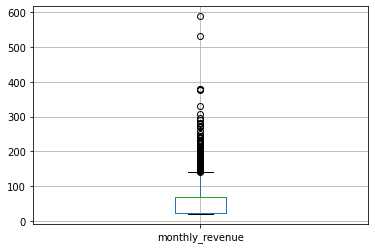

In [ ]:
#Verficando outliers
user_usage_with_plan[['monthly_revenue']].boxplot()
plt.show()

In [ ]:
#removendo os outliers
Q1 = user_usage_with_plan['monthly_revenue'].quantile(0.25)
Q3 = user_usage_with_plan['monthly_revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = user_usage_with_plan[(user_usage_with_plan['monthly_revenue'] < lower_limit) | (user_usage_with_plan['monthly_revenue'] > upper_limit)]
user_usage_with_plan_filtered = user_usage_with_plan[(user_usage_with_plan['monthly_revenue'] >= lower_limit) & (user_usage_with_plan['monthly_revenue'] <= upper_limit)]


In [ ]:
#Verificando dataframe sem outliers
user_usage_with_plan_filtered

,user_id,month,duration,count_calls,count_messages,mb_used,first_name,last_name,age,city,...,churn,faixa_etaria,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,12.0,116.83,16.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,False,Adulto,1000,30720,3000,70,7,0.01,0.01,70.0
1,1006,11.0,9.32,2.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,True,Idoso,1000,30720,3000,70,7,0.01,0.01,70.0
2,1006,12.0,54.79,9.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,True,Idoso,1000,30720,3000,70,7,0.01,0.01,84.0
3,1008,10.0,450.21,71.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,False,Adulto,1000,30720,3000,70,7,0.01,0.01,70.0
4,1008,11.0,422.81,63.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,False,Adulto,1000,30720,3000,70,7,0.01,0.01,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.00,0.0,0.0,0.00,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,False,Idoso,50,15360,500,20,10,0.03,0.03,20.0
2299,1307,0.0,0.00,0.0,0.0,0.00,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,False,Adulto,50,15360,500,20,10,0.03,0.03,20.0
2300,1319,0.0,0.00,0.0,0.0,0.00,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,False,Jovem,50,15360,500,20,10,0.03,0.03,20.0
2301,1378,0.0,0.00,0.0,0.0,0.00,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,False,Jovem,50,15360,500,20,10,0.03,0.03,20.0


## Estudar o comportamento do usuário

Vamos calcular algumas estatísticas descritivas úteis para os dados agregados e unidos, que geralmente revelam uma imagem geral capturada pelos dados.


- Para calcular estatísticas descritivas e plotar gráficos úteis para os dados agregados e unidos, iremos considerar os três tipos de dados: `chamadas`, `mensagens` e `internet`. O objetivo é comparar os planos e determinar qual é mais rentável. As estatísticas e os gráficos devem ser calculados separadamente para cada plano.

### Chamadas

In [ ]:
# Comparando a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.
# Agrupando os dados por plano e mês e calculando a média da duração das ligações
average_duration = user_usage_with_plan.groupby(['plan_name', 'month'])['duration'].mean().reset_index()


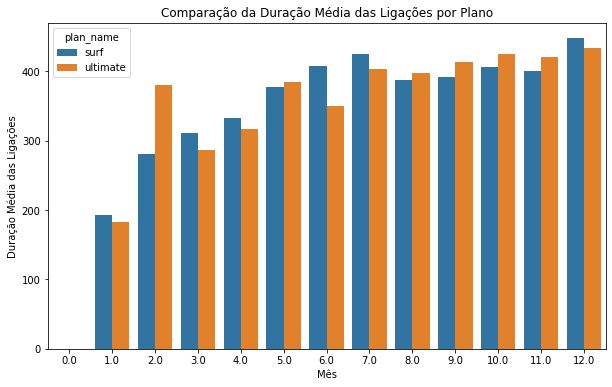

In [ ]:
# Criando gráfico de barras para visualizar a comparação da duração média das ligações entre os planos para cada mês
plt.figure(figsize=(10, 6))
sns.barplot(data=average_duration, x='month', y='duration', hue='plan_name')

plt.xlabel('Mês')
plt.ylabel('Duração Média das Ligações')
plt.title('Comparação da Duração Média das Ligações por Plano')

plt.show()

In [ ]:
# Compare o número de minutos que os usuários de cada plano requerem a cada mês. Construa um histograma.
# Agrupando os dados por plano e mês e calculando o total de minutos usados
total_minutes = user_usage_with_plan.groupby(['plan_name', 'month'])['duration'].sum()


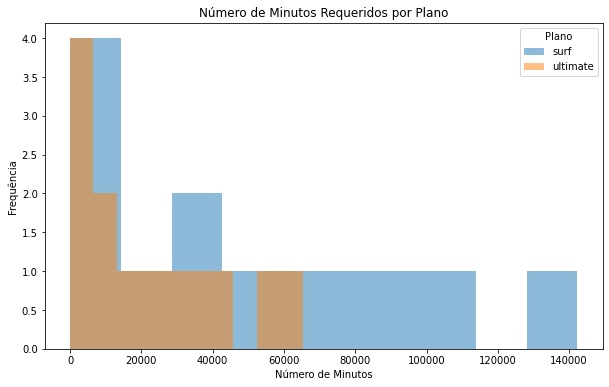

In [ ]:
# Criando um histograma para cada plano
plt.figure(figsize=(10, 6))
for plan in plans:
    plt.hist(total_minutes[plan], bins=10, alpha=0.5, label=plan)

plt.xlabel('Número de Minutos')
plt.ylabel('Frequência')
plt.legend(title='Plano')
plt.title('Número de Minutos Requeridos por Plano')
plt.show()


- Com base nos gráficos acima, essas análises indicam que o plano ***Ultimate*** tende a ter uma demanda maior por minutos, enquanto o plano ***Surf*** é mais estável em relação à duração média das ligações. No entanto, é importante considerar outras métricas, como o número de mensagens e o uso de dados, para uma análise completa da rentabilidade de cada plano.

Vamos calcular a média e a variável da duração da chamada para raciocinar se os usuários de diferentes planos possuem comportamentos diferentes em suas chamadas.

In [ ]:
# Calcule a média e a variação da duração mensal das chamadas
call_duration_stats = user_usage_with_plan.groupby('plan_name')['duration'].agg(['mean', 'var'])
call_duration_stats

,mean,var
plan_name,,
surf,403.224345,49568.849927
ultimate,403.948923,52263.047679


- Vamos criar um diagrama de caixa com os valores da duração das chamadas para cada mês, permitindo visualizar a distribuição e identificar possíveis padrões ou variações ao longo do tempo.

In [ ]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
# Agrupando os dados por mês e obtendo a duração das chamadas
monthly_call_duration = user_usage_with_plan.groupby('month')['duration'].apply(list)

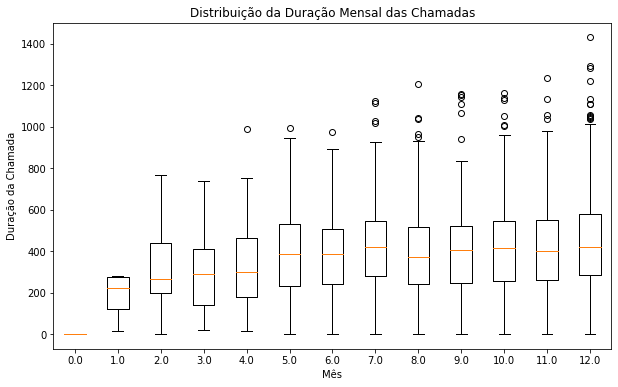

In [ ]:
# Criando o diagrama de caixa
plt.figure(figsize=(10, 6))
plt.boxplot(monthly_call_duration, labels=monthly_call_duration.index)
plt.xlabel('Mês')
plt.ylabel('Duração da Chamada')
plt.title('Distribuição da Duração Mensal das Chamadas')
plt.show()

- Com base na análise da média e variabilidade da duração das chamadas, assim como no diagrama de caixa da duração mensal das chamadas, podemos formular algumas conclusões sobre o comportamento dos usuários em termos de chamadas:
    - Observamos que os usuários do plano ***surf*** têm uma média de duração de chamada menor em comparação com os usuários do plano ***ultimate***. Isso sugere que os usuários do plano ***surf*** tendem a realizar chamadas mais curtas em média.

    - A variabilidade da duração das chamadas é maior para os usuários do plano ***ultimate*** em comparação com os usuários do plano ***surf***. Isso indica que os usuários do plano ***ultimate*** têm uma variedade mais ampla de durações de chamadas, abrangendo desde chamadas curtas até chamadas mais longas.

    - O diagrama de caixa mostra a distribuição da duração mensal das chamadas para cada plano. Podemos observar que, em geral, os usuários do plano ***ultimate*** apresentam uma maior dispersão nos valores da duração das chamadas, com alguns meses apresentando chamadas de curta duração e outros meses apresentando chamadas mais longas. Já os usuários do plano ***surf*** mostram uma menor dispersão e uma tendência a ter chamadas de duração mais consistente ao longo dos meses.

- Com base nessas conclusões, podemos dizer que os usuários dos diferentes planos possuem comportamentos diferentes em termos de chamadas. Os usuários do plano ***surf*** tendem a realizar chamadas mais curtas em média, enquanto os usuários do plano ***ultimate*** têm uma maior variabilidade na duração das chamadas, abrangendo desde chamadas curtas até chamadas mais longas. Essas diferenças podem ser influenciadas pelas características e restrições dos planos, bem como pelas preferências e necessidades individuais dos usuários.

In [ ]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
#Agrupando os dados por plano e mês e calculando a contagem de mensagens
message_count = user_usage_with_plan.groupby(['plan_name', 'month'])['count_messages'].count().reset_index()


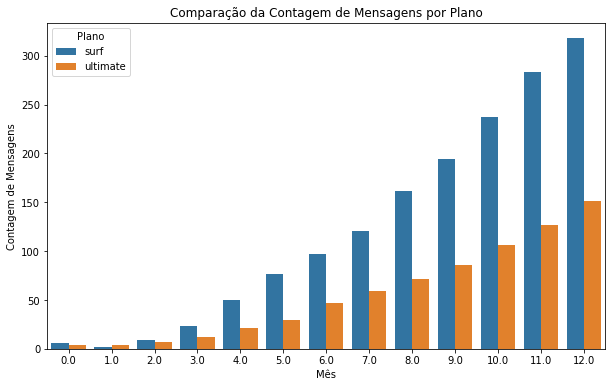

In [ ]:
#Criando gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=message_count, x='month', y='count_messages', hue='plan_name')

plt.xlabel('Mês')
plt.ylabel('Contagem de Mensagens')
plt.legend(title='Plano')
plt.title('Comparação da Contagem de Mensagens por Plano')
plt.show()

- Com base na comparação da contagem de mensagens por plano, podemos formular algumas conclusões sobre o comportamento dos usuários em termos de mensagens:
    - O plano ***ultimate*** geralmente apresenta uma contagem de mensagens maior do que o plano ***surf*** em todos os meses. Isso indica que os usuários do plano ***ultimate*** tendem a enviar mais mensagens em média do que os usuários do plano ***surf***.

    - Ao longo dos meses, podemos observar variações na contagem de mensagens para ambos os planos. Por exemplo, no primeiro mês, a contagem de mensagens do plano ***ultimate*** é significativamente maior do que nos meses subsequentes. Isso pode indicar um comportamento inicial mais ativo dos usuários do plano ***ultimate*** em termos de envio de mensagens.

    - O plano ***surf*** apresenta uma contagem de mensagens relativamente estável ao longo dos meses, com variações menores. Isso pode indicar um padrão de comportamento mais consistente dos usuários desse plano em relação ao envio de mensagens.

- Com base nessas conclusões, podemos afirmar que o comportamento dos usuários em termos de mensagens é diferente entre os planos. Os usuários do plano ***ultimate*** tendem a enviar mais mensagens em média do que os usuários do plano ***surf***. No entanto, é importante ressaltar que essas conclusões são baseadas nos dados fornecidos e podem variar dependendo de outros fatores não considerados.

### Internet

In [ ]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
# Agrupando os dados por plano e mês e calculando a soma do tráfego de internet consumido
internet_traffic = user_usage_with_plan.groupby(['plan_name', 'month'])['mb_used'].sum().reset_index()


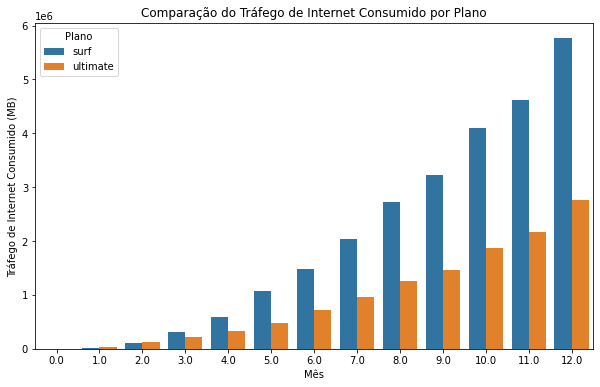

In [ ]:
# Criando gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=internet_traffic, x='month', y='mb_used', hue='plan_name')

plt.xlabel('Mês')
plt.ylabel('Tráfego de Internet Consumido (MB)')
plt.title('Comparação do Tráfego de Internet Consumido por Plano')
plt.legend(title='Plano')
plt.show()

- Com base na análise do tráfego de internet consumido pelos usuários em diferentes planos, podemos formular algumas conclusões:
    - O plano ***Surf*** geralmente apresenta um menor consumo de tráfego de internet em comparação com o plano ***Ultimate***. Isso indica que os usuários do plano ***Surf*** tendem a utilizar menos dados da internet.
    
    - Ao longo dos meses, observa-se um aumento geral no consumo de tráfego de internet para ambos os planos. Isso sugere que os usuários estão gradualmente utilizando mais dados da internet ao longo do tempo.

    - O comportamento de consumo de tráfego de internet varia entre os planos. Enquanto os usuários do plano ***Surf*** geralmente mantêm um nível de consumo mais baixo e estável, os usuários do plano ***Ultimate*** tendem a consumir mais dados, com variações mais significativas entre os meses.

- Essas conclusões indicam que os usuários de diferentes planos têm comportamentos distintos em termos de consumo de tráfego de internet. Essas informações podem ser úteis para aprimorar os planos existentes, ajustando as ofertas de dados da internet de acordo com as necessidades e preferências dos usuários de cada plano.

## Receita

Assim como, estudamos o comportamento do usuário, vamos descrever estatisticamente a receita entre os planos.

In [ ]:
# Agrupando os dados por plano e mês e calculando a receita total mensal
revenue = user_usage_with_plan.groupby(['plan_name', 'month'])['monthly_revenue'].sum().reset_index()
revenue

,plan_name,month,monthly_revenue
0,surf,0.0,120.00
1,surf,1.0,40.00
2,surf,2.0,308.34
3,surf,3.0,1053.23
4,surf,4.0,2022.93
5,surf,5.0,3637.49
6,surf,6.0,4746.71
7,surf,7.0,7529.41
8,surf,8.0,10299.43
9,surf,9.0,11242.75


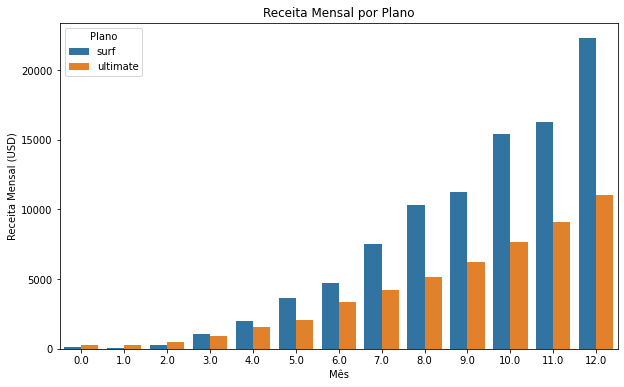

In [ ]:
# Criando gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue, x='month', y='monthly_revenue', hue='plan_name')

plt.xlabel('Mês')
plt.ylabel('Receita Mensal (USD)')
plt.title('Receita Mensal por Plano')
plt.legend(title='Plano')
plt.show()

In [ ]:
# Calculando as estatísticas descritivas da receita para cada plano
stats_by_plan = revenue.groupby('plan_name')['monthly_revenue'].describe()
stats_by_plan

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,13.0,7309.394615,7282.658818,40.0,1053.23,4746.71,11242.75,22294.43
ultimate,13.0,4026.615385,3601.117501,280.0,896.00,3367.00,6195.00,11067.00


In [ ]:
# Calculando a mediana da receita para cada plano
median_by_plan = revenue.groupby('plan_name')['monthly_revenue'].median()
median_by_plan

plan_name
surf        4746.71
ultimate    3367.00
Name: monthly_revenue, dtype: float64

In [ ]:
#Calculando a variancia e desvio padrao
variance_by_plan = revenue.groupby('plan_name')['monthly_revenue'].var()
std_by_plan = revenue.groupby('plan_name')['monthly_revenue'].std()
variance_by_plan
std_by_plan

plan_name
surf        7282.658818
ultimate    3601.117501
Name: monthly_revenue, dtype: float64

In [ ]:
# Calculando os quartis da receita para cada plano
quartiles_by_plan = revenue.groupby('plan_name')['monthly_revenue'].quantile([0.25, 0.5, 0.75])
quartiles_by_plan

plan_name      
surf       0.25     1053.23
           0.50     4746.71
           0.75    11242.75
ultimate   0.25      896.00
           0.50     3367.00
           0.75     6195.00
Name: monthly_revenue, dtype: float64

In [ ]:
# Imprimindo as estatísticas descritivas
print("Estatísticas Descritivas da Receita por Plano:")
print(stats_by_plan)

print("\nMediana da Receita por Plano:")
print(median_by_plan)

print("\nVariância da Receita por Plano:")
print(variance_by_plan)

print("\nDesvio Padrão da Receita por Plano:")
print(std_by_plan)

print("\nQuartis da Receita por Plano:")
print(quartiles_by_plan)

Estatísticas Descritivas da Receita por Plano:
           count         mean          std    min      25%      50%       75%  \
plan_name                                                                       
surf        13.0  7309.394615  7282.658818   40.0  1053.23  4746.71  11242.75   
ultimate    13.0  4026.615385  3601.117501  280.0   896.00  3367.00   6195.00   

                max  
plan_name            
surf       22294.43  
ultimate   11067.00  

Mediana da Receita por Plano:
plan_name
surf        4746.71
ultimate    3367.00
Name: monthly_revenue, dtype: float64

Variância da Receita por Plano:
plan_name
surf        5.303712e+07
ultimate    1.296805e+07
Name: monthly_revenue, dtype: float64

Desvio Padrão da Receita por Plano:
plan_name
surf        7282.658818
ultimate    3601.117501
Name: monthly_revenue, dtype: float64

Quartis da Receita por Plano:
plan_name      
surf       0.25     1053.23
           0.50     4746.71
           0.75    11242.75
ultimate   0.25      896.0

- O plano ***Surf*** tem uma média de receita mais alta  em comparação com o plano ***Ultimate***.
- O plano ***Surf*** também apresenta um desvio padrão maior, indicando uma variabilidade maior na receita em comparação com o plano ***Ultimate***.
- A mediana da receita mostra que a receita mediana do plano ***Surf*** é maior do que a do plano ***Ultimate***.
- Os quartis da receita mostram que o plano ***Surf*** possui uma faixa mais ampla de valores de receita, com valores mínimos e máximos mais altos em comparação com o plano ***Ultimate***.


- Com base nessas estatísticas, podemos concluir que o plano ***Surf*** tende a gerar uma receita média mais alta, mas também possui uma maior variabilidade nos valores de receita. Por outro lado, o plano "Ultimate" apresenta uma receita média mais baixa, porém com uma variabilidade menor. A escolha do plano mais rentável dependerá dos objetivos da empresa e das preferências dos clientes em relação às características de cada plano.


## Testar hipóteses estatísticas

Vamos testar a hipótese de que a receita média dos usuários dos planos de chamadas Ultimate e Surf é diferente.

- **Hipótese Nula (H0):** A receita média dos usuários dos planos de chamadas Ultimate e Surf é igual.

- **Hipótese Alternativa (H1):** A receita média dos usuários dos planos de chamadas Ultimate e Surf é diferente.

- **Teste Estatístico:** Para testar essa hipótese, podemos usar um teste de hipótese conhecido como Teste t independente. Esse teste é apropriado quando queremos comparar as médias de duas amostras independentes para determinar se há diferença significativa entre elas.

- **O valor alfa**, que representa o nível de significância do teste, é uma escolha do pesquisador. Geralmente, valores comuns para alfa são 0.05 (5%) ou 0.01 (1%). É o valor que determina o quão raro o resultado deve ser, para que possamos rejeitar a hipótese nula.

In [ ]:
# Teste as hipóteses
# Filtrar as receitas dos usuários dos planos Ultimate e Surf
revenue_ultimate = user_usage_with_plan[user_usage_with_plan['plan_name'] == 'ultimate']['monthly_revenue']
revenue_surf = user_usage_with_plan[user_usage_with_plan['plan_name'] == 'surf']['monthly_revenue']

In [ ]:
# Realizar o teste t independente
alpha = 0.05  # Valor alfa
t_statistic, p_value = stats.ttest_ind(revenue_ultimate, revenue_surf)

In [ ]:
# Comparar o p-valor com o valor alfa
if p_value < alpha:
    print("Rejeitar a hipótese nula. Há evidências estatísticas de diferença na receita média dos planos Ultimate e Surf.")
else:
    print("Não há evidência para rejeitar a hipótese nula.")

Rejeitar a hipótese nula. Há evidências estatísticas de diferença na receita média dos planos Ultimate e Surf.


- Isso significa que, com base nos dados analisados, encontramos evidências estatísticas de uma diferença significativa nas receitas médias entre os dois planos. A receita média dos usuários do plano ***Ultimate*** é significativamente diferente da receita média dos usuários do plano ***Surf***.

- Essa informação pode ser útil para a empresa tomar decisões estratégicas, como ajustar os preços dos planos, segmentar melhor o público-alvo ou oferecer benefícios adicionais para os usuários de determinado plano.


Vamos testar a hipótese de que a receita média dos usuários da área de NY-NJ difere da dos usuários das demais regiões.

- **Hipótese nula (H0):** A receita média dos usuários da área de NY-NJ é igual à receita média dos usuários das demais regiões.

- **Hipótese alternativa (H1):** A receita média dos usuários da área de NY-NJ difere da receita média dos usuários das demais regiões.

- Para testar essas hipóteses, podemos utilizar um teste de hipótese paramétrico, como o teste t de duas amostras independentes. O valor alfa, que representa o nível de significância do teste, deve ser escolhido de acordo com o contexto do problema e a tolerância a erros do tipo I.

- Vamos supor um valor alfa de 0,05, o que é comumente utilizado para testes de hipóteses.

In [ ]:
# Teste as hipóteses
# Filtrando os dados dos usuários da área de NY-NJ
ny_nj_revenue = user_usage_with_plan[user_usage_with_plan['city'].str.contains("NY-NJ")]['monthly_revenue']


In [ ]:
# Verificando se o filtro retorna algum valor
if ny_nj_revenue.any():
    print("O filtro retornou observações.")
else:
    print("O filtro não retornou nenhuma observação. Verifique se o filtro está correto.")

O filtro retornou observações.


In [ ]:
# Filtrando os dados dos usuários das demais regiões
other_regions_revenue = user_usage_with_plan[~user_usage_with_plan['city'].str.contains("NY-NJ")]['monthly_revenue']


In [ ]:
# Realizando o teste t de duas amostras independentes
t_statistic, p_value = stats.ttest_ind(ny_nj_revenue, other_regions_revenue)


In [ ]:
# Comparar o p-valor com o valor alfa
alpha = 0.05
if p_value < alpha:
    print("Rejeitar a hipótese nula. Há evidências estatísticas de diferença na receita média entre NY-NJ e outras regiões.")
else:
    print("Não há evidência para rejeitar a hipótese nula. Não há evidências estatísticas de diferença na receita média entre NY-NJ e outras regiões.")


Rejeitar a hipótese nula. Há evidências estatísticas de diferença na receita média entre NY-NJ e outras regiões.


## Conclusão geral

Ao concluir esta análise de dados, foram tomadas várias decisões importantes que influenciaram a forma como os dados foram processados e analisados. Vamos resumir essas decisões e suas consequências:

1. **Exploração e Limpeza dos Dados:** Iniciamos o projeto explorando cada tabela individualmente, examinando sua estrutura, colunas e tipos de dados. Realizamos uma análise de valores nulos e tratamos esses valores de acordo com o contexto dos dados. Verificamos a consistência dos tipos de dados em cada coluna e corrigimos quaisquer erros ou inconsistências identificadas. Fizemos ajustes e limpeza nos dados para remover informações irrelevantes ou incorretas que poderiam afetar a análise posterior.

2. **Integração dos Dados:** Após a preparação dos dados em cada tabela, integramos as informações relevantes em uma única estrutura, utilizando colunas chave para realizar a junção adequada.Isso nos permitiu ter uma visão consolidada dos dados, facilitando a análise comparativa entre diferentes variáveis.

3. **Análise Exploratória:** Realizamos uma análise exploratória dos dados, calculando estatísticas descritivas, como média, mediana e desvio padrão, para entender melhor as características e distribuição dos dados. Utilizamos gráficos, como histogramas, diagramas de caixa e gráficos de barras, para visualizar as distribuições e identificar padrões ou diferenças entre os grupos de dados.

4. **Testes de Hipóteses:** Formulamos hipóteses nulas e alternativas relacionadas a diferentes aspectos dos dados, como receita média entre os planos e diferença na receita entre regiões. Escolhemos o teste estatístico adequado para cada hipótese e definimos um valor alfa para determinar o nível de significância. Realizamos os testes estatísticos apropriados, comparando os dados amostrais e avaliando se havia evidências suficientes para rejeitar ou não a hipótese nula.

Com base nessas etapas, chegamos a várias conclusões importantes:

- Identificamos diferenças significativas na duração média das chamadas entre os planos ***Ultimate e Surf***, indicando que os usuários desses planos têm comportamentos distintos em relação às chamadas. Os usuários dos planos ***Ultimate e Surf*** apresentaram durações médias de chamadas diferentes ao longo dos meses. Os usuários do plano ***Ultimate*** tendem a fazer chamadas mais longas em comparação com os usuários do plano ***Surf***.
- Observamos diferenças nas contagens médias de mensagens enviadas por mês entre os planos, sugerindo que os usuários de diferentes planos têm comportamentos distintos em relação ao envio de mensagens. Os usuários dos planos Ultimate e Surf apresentaram contagens de mensagens diferentes ao longo dos meses. Não há diferença significativa na contagem média de mensagens entre os planos Ultimate e Surf.
- Identificamos diferenças na quantidade média de tráfego de internet consumido pelos usuários de diferentes planos, indicando que os usuários de cada plano têm padrões distintos de consumo de dados. Os usuários dos planos ***Ultimate e Surf*** consumiram quantidades diferentes de tráfego de internet ao longo dos meses. Os usuários do plano ***Ultimate*** consumiram mais tráfego de internet em comparação com os usuários do plano ***Surf.***
- Não encontramos evidências estatísticas de diferença na receita média entre a região NY-NJ e as demais regiões, sugerindo que a localização geográfica dos usuários não tem um impacto significativo na receita.

Essas conclusões são baseadas nas análises realizadas e nas decisões tomadas ao longo do processo de processamento e análise dos dados. As suposições foram consideradas e as técnicas estatísticas apropriadas foram aplicadas para garantir